# DT2470-project-group3

hanqi@kth.se

qianzho@kth.se

In [1]:
%matplotlib inline

import IPython.display as ipd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
import sklearn.utils, sklearn.preprocessing, sklearn.decomposition, sklearn.svm
import librosa
import librosa.display
import pickle
import os
from sklearn.model_selection import train_test_split

# Data Preprocessing

In [38]:
directory = './ismir04_genre/audio'
print("Start loading audio files!" )

read_num = 1500
song_num = 1742
mfcc_total = np.zeros((song_num, 20, read_num), dtype=float)
mel_total = np.zeros((song_num, 20, read_num), dtype=float)
beats_total = np.zeros((song_num, 1, read_num), dtype=float)
spec_cent_total = np.zeros((song_num, 1, read_num), dtype=float)
chromagram_total = np.zeros((song_num, 12, read_num), dtype=float)
rms_total = np.zeros((song_num, 1, read_num), dtype=float)
zerocross_total = np.zeros((song_num, 1, read_num), dtype=float)
cqt_total = np.zeros((song_num, 12, read_num), dtype=float)
cens_total = np.zeros((song_num, 12, read_num), dtype=float)
rolloff_total = np.zeros((song_num, 1, read_num), dtype=float)

labels_total = []
label_idx = 0
audio_idx = 0

for _, dirs, _ in os.walk(directory):
    for dir in dirs:
        for _, _, files in os.walk(directory + '/' + dir):
            for file in files:
                if os.path.splitext(file)[1] != '.mp3':
                    continue
                print("Loading " + file)
                y, sr = librosa.load(directory + '/' + dir + '/' + file)
                
                mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)
                mel = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=20, window='hann')
                tempo, beats = librosa.beat.beat_track(y=y, sr=sr)
                spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
                chromagram = librosa.feature.chroma_stft(y=y, sr=sr)
                rms = librosa.feature.rms(y=y)
                zerocross = librosa.feature.zero_crossing_rate(y=y)
                cqt = librosa.feature.chroma_cqt(y=y, sr=sr)
                cens = librosa.feature.chroma_cens(y=y, sr=sr)
                rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr, window='hann')
                
                mfcc_total[audio_idx, :, 0:read_num] = mfcc[:,0:read_num]
                mel_total[audio_idx, :, 0:read_num] = mel[:,0:read_num]
                if beats.shape[0] <= read_num:
                    beats_total[audio_idx, :, 0:beats.shape[0]] = beats
                    beats_total[audio_idx, :, beats.shape[0]+1] = tempo
                else:
                    beats_total[audio_idx, :, 0:read_num-2] = beats[0:read_num-2]
                    beats_total[audio_idx, :, read_num-1] = tempo
                spec_cent_total[audio_idx, :, 0:read_num] = spec_cent[:,0:read_num]
                chromagram_total[audio_idx, :, 0:read_num] = chromagram[:,0:read_num]
                rms_total[audio_idx, :, 0:read_num] = rms[:,0:read_num]
                zerocross_total[audio_idx, :, 0:read_num] = zerocross[:,0:read_num]
                cqt_total[audio_idx, :, 0:read_num] = cqt[:,0:read_num]
                cens_total[audio_idx, :, 0:read_num] = cens[:,0:read_num]
                rolloff_total[audio_idx, :, 0:read_num] = rolloff[:,0:read_num]            
                
                labels_total.append(label_idx)
                audio_idx = audio_idx + 1
        label_idx = label_idx + 1
        print(label_idx)
        
features = np.concatenate((mfcc_total, 
                           mel_total,
                           beats_total,
                           spec_cent_total,
                           chromagram_total, 
                           rms_total,
                           zerocross_total,
                           cqt_total,
                           cens_total,
                           rolloff_total
                          ), axis=1)
print(features.shape)

labels_total = np.array(labels_total)
print(labels_total)
print(labels_total.shape)

print('Save raw features!')
try:
    with open("raw_features.pkl", 'wb') as file:
        save = {'raw_features': features, 'labels': labels_total}
        pickle.dump(save, file, pickle.HIGHEST_PROTOCOL)
        file.close()
        print("Features saved!")
except FileNotFoundError:
    print('Unable to save data!')
    raise

Start loading audio files!
Loading 1-come_again_sweet_love_doth_now_invite(john_dowloand).mp3


C:\Users\Grimmar\AppData\Roaming\Python\Python39\site-packages\librosa\util\decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


Loading 1-concerto_for_2_violins_2_cellos_strings_&_continuo_in_g_rv_575_allegro.mp3


C:\Users\Grimmar\AppData\Roaming\Python\Python39\site-packages\librosa\util\decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


Loading 1-concerto_no.1_in_d_major_rv_2.mp3
Loading 1-fantasia_1.mp3
Loading 1-fantasia_nona.mp3
Loading 1-good_news_to_vsenoschnaya.mp3
Loading 1-handel_trio_sonata_op._5_no.4.mp3
Loading 1-matteis_ground_after_the_scotch_humour.mp3
Loading 1-ma_belle_si_ton_ame_(gilles_durant_de_la_bergerie).mp3
Loading 1-overture_suite_from_les_fetes.mp3
Loading 1-oxenford_(anon).mp3
Loading 1-o_thou_the_only_begotten_son_come_us_worship.mp3
Loading 1-prelude_(phalese).mp3
Loading 1-preludio_i.mp3
Loading 1-recercar_1.mp3
Loading 1-set_a_6_in_c_major_fantazy.mp3
Loading 1-si_me_llaman_a_mi_llaman.mp3
Loading 1-sonata_no._6_in_g_minor_andante.mp3
Loading 1-sonata_prima_in_do_minore_-_adagio.mp3
Loading 1-suite_iii_in_do_maggiore_-_prelude.mp3
Loading 1-suite_in_d_minor_-_allemande_l.mp3
Loading 1-suite_i_in_sol_maggiore_-_prelude.mp3
Loading 1-tamerlano_act_iii_track_1.mp3
Loading 1-tamerlano_act_i_track_1.mp3
Loading 1-toccata_xx.mp3
Loading 1-to_thee_we_sing_bulgarian_chant_tone_legetos.mp3
Loading

Loading 18-tamerlano_act_i_track_18.mp3
Loading 19-canticle_to_the_pochaev_icon_of_the_virgin.mp3
Loading 19-de_sarabande.mp3
Loading 19-l_amor_dona_ch_io_te_porto.mp3
Loading 19-many_years_(v.lebedeva).mp3
Loading 19-nicht_schnell_davidsb_ndlert_nze_op._6.mp3
Loading 19-pavan.mp3
Loading 19-pavan_sedet_sola_(lute).mp3
Loading 19-pisendel_sonata_in_e_minor_for_violin_and_continuo.mp3
Loading 19-sonata_v_allegro.mp3
Loading 19-suite_v_in_do_minore_-_gigue.mp3
Loading 19-tamerlano_act_i_track_19.mp3
Loading 19-tobacco_(hume).mp3
Loading 2-air_gai_suite_from_les_fetes.mp3
Loading 2-allegro_sonata_for_oboe_and_b.mp3
Loading 2-anon_part_ii_virtus_sancti_spiritus.mp3
Loading 2-ar_ne_kuth_ich_sorghe_non.mp3
Loading 2-blow_northerne_wynd.mp3
Loading 2-come_let_us_worship_(georgian_chant).mp3
Loading 2-concerto_for_2_violins_2_cellos_strings_&_continuo_in_g_rv_575_largo.mp3
Loading 2-english_danse.mp3
Loading 2-fantasia_2.mp3
Loading 2-fantasia_25_(anon).mp3
Loading 2-fantasia_vi.mp3
Loading 2-

Loading 5-tamerlano_act_iii_track_5.mp3
Loading 5-tamerlano_act_i_track_5.mp3
Loading 5-victime_paschali_laudes.mp3
Loading 5-villancico_levayme_amor_d'aquesta_terra.mp3
Loading 5-waissel_polish_dance.mp3
Loading 6-11_bagatelles_for_solo_fortepiano_op._119_no._3.mp3
Loading 6-bwv_1042_iii._allegro_assai.mp3
Loading 6-capirola_qui_tollis_peccata_mundi.mp3
Loading 6-corrente_iii_con_la_sua_replica.mp3
Loading 6-fantasia_6.mp3
Loading 6-fantasia_iv.mp3
Loading 6-having_slept_in_the_flesh_as_a_mortal.mp3
Loading 6-man_mai_longe_lives_weene.mp3
Loading 6-partita_prima_in_mi_minore_-_double.mp3
Loading 6-pavana_(no._6).mp3
Loading 6-recercar_6.mp3
Loading 6-recercar_6_(steel_string_guitar).mp3
Loading 6-recercata_87_(da_milano).mp3
Loading 6-recercata_primera_(ortiz).mp3
Loading 6-rossi_toccata_vii.mp3
Loading 6-sergei_rachmaninoff_-_6_moment.mp3
Loading 6-sonata_no._4_in_f_major_allegro.mp3
Loading 6-sonata_terza_in_fa_maggiore_-_adagio.mp3
Loading 6-suite_in_d_minor_-_gigue_la_ma.mp3
Loadi

Loading artist_25_album_2_track_3.mp3
Loading artist_27_album_1_track_1.mp3
Loading artist_27_album_1_track_2.mp3
Loading artist_27_album_1_track_3.mp3
Loading artist_27_album_1_track_4.mp3
Loading artist_27_album_1_track_6.mp3
Loading artist_27_album_1_track_7.mp3
Loading artist_29_album_1_track_1.mp3
Loading artist_2_album_1_track_2.mp3
Loading artist_30_album_1_track_1.mp3
Loading artist_30_album_1_track_2.mp3
Loading artist_30_album_1_track_3.mp3
Loading artist_30_album_1_track_4.mp3
Loading artist_30_album_1_track_5.mp3
Loading artist_30_album_1_track_6.mp3
Loading artist_31_album_1_track_2.mp3
Loading artist_31_album_1_track_3.mp3
Loading artist_31_album_1_track_4.mp3
Loading artist_32_album_1_track_1.mp3
Loading artist_32_album_1_track_2.mp3
Loading artist_32_album_1_track_3.mp3
Loading artist_32_album_1_track_4.mp3
Loading artist_32_album_1_track_5.mp3
Loading artist_32_album_1_track_6.mp3
Loading artist_32_album_3_track_1.mp3
Loading artist_32_album_3_track_2.mp3
Loading artis

Loading 5-prelude.mp3
Loading 5-re-entry.mp3
Loading 5-ruff_and_tumble.mp3
Loading 5-rumors_of_a_strange_planet.mp3
Loading 5-strange_days.mp3
Loading 5-the_persuaders_dub.mp3
Loading 5-tin_can_command.mp3
Loading 5-transcend_(fate_of_a_dj).mp3
Loading 6-angels.mp3
Loading 6-bass_vibrations.mp3
Loading 6-be_brave_(blotter_bros._mix).mp3
Loading 6-city_traffic.mp3
Loading 6-click_full_pussy.mp3
Loading 6-country_man.mp3
Loading 6-don_t_funk_(with_the_funk_junkie).mp3
Loading 6-hiphop110.mp3
Loading 6-in.mp3
Loading 6-leaving.mp3
Loading 6-leaving_ground.mp3
Loading 6-liquid_to_light.mp3
Loading 6-money.mp3
Loading 6-old_skool.mp3
Loading 6-palacinka.mp3
Loading 6-rain_at_night.mp3
Loading 6-raving_illusion_(138_bpm_remix).mp3
Loading 6-saturn_blues.mp3
Loading 6-slidewalk.mp3
Loading 6-sunday.mp3
Loading 6-teegma.mp3
Loading 6-uci_kuci.mp3
Loading 6-vibrant.mp3
Loading 7-call_me_snake.mp3
Loading 7-computer_control.mp3
Loading 7-denial.mp3
Loading 7-feather.mp3
Loading 7-introduce.mp3
L

Loading 4-crawlspace.mp3
Loading 4-feverdream_#1.mp3
Loading 4-jack_rabbit.mp3
Loading 4-new_rage.mp3
Loading 4-prisoners_of_america.mp3
Loading 4-right_on_target.mp3
Loading 4-what's_wrong_with_my_footm.mp3
Loading 5-born_wild.mp3
Loading 5-code_red_love_is_dead.mp3
Loading 5-deal_with_it.mp3
Loading 5-euthanize_tunnel_zone.mp3
Loading 5-godofhate.mp3
Loading 5-kc_rip_off.mp3
Loading 5-magic_castle.mp3
Loading 5-obscenity.mp3
Loading 5-tammy_ate_a_bad_piece_of_pork.mp3
Loading 6-backdoor_man.mp3
Loading 6-demolition_joyride.mp3
Loading 6-gone_to_the_other_room.mp3
Loading 6-in_my_livid_eyes.mp3
Loading 6-november.mp3
Loading 6-nuclear_blues.mp3
Loading 6-satan_s_grave.mp3
Loading 6-takin'_it_all.mp3
Loading 6-three.mp3
Loading 7-can't_sleep.mp3
Loading 7-face_at_the_edge_of_the_crowd.mp3
Loading 7-heavenly_rain.mp3
Loading 7-kill_with_a_vengeance_(live).mp3
Loading 7-learn_to_burn.mp3
Loading 7-mud.mp3
Loading 7-rocket_in_my_veins.mp3
Loading 7-scuttlebutt_strut.mp3
Loading 7-serenade

Loading 9-goodbye_caramel.mp3
Loading 9-interlude_2.mp3
Loading 9-in_the_morning.mp3
Loading 9-i_saw_a_rainbow.mp3
Loading 9-lost.mp3
Loading 9-michael.mp3
Loading 9-mr._y.mp3
Loading 9-one_at_a_time_(featuring_monic.mp3
Loading 9-overreacting.mp3
Loading 9-situation.mp3
Loading 9-the_one_that_got_away.mp3
Loading 9-tied.mp3
Loading 9-unhappy_hour.mp3
Loading artist_100_album_1_track_1.mp3
Loading artist_100_album_1_track_2.mp3
Loading artist_100_album_1_track_3.mp3
Loading artist_100_album_1_track_4.mp3
Loading artist_100_album_2_track_1.mp3
Loading artist_100_album_2_track_2.mp3
Loading artist_100_album_2_track_3.mp3
Loading artist_100_album_3_track_1.mp3
Loading artist_100_album_3_track_2.mp3
Loading artist_100_album_3_track_3.mp3
Loading artist_100_album_4_track_1.mp3
Loading artist_100_album_4_track_2.mp3
Loading artist_100_album_4_track_3.mp3
Loading artist_100_album_4_track_4.mp3
Loading artist_100_album_5_track_1.mp3
Loading artist_100_album_5_track_2.mp3
Loading artist_100_alb

Loading 7-redemption_(12-8_8-4).mp3
Loading 7-sehtar_dastan.mp3
Loading 7-shaman_fever.mp3
Loading 7-stick_dance.mp3
Loading 7-still_in_all_deep_in_each.mp3
Loading 7-the_brandevin.mp3
Loading 7-zar_dance_(ayyub)_2_4.mp3
Loading 8-boathag.mp3
Loading 8-butterflies.mp3
Loading 8-childbirth_in_a_cave_art.mp3
Loading 8-daldalar_tamzara.mp3
Loading 8-foreshadow.mp3
Loading 8-hifumi-chor.mp3
Loading 8-koron.mp3
Loading 8-one_if_by_sea.mp3
Loading 8-sair_(trip).mp3
Loading 8-string_tease_coincidence.mp3
Loading 8-the_minstrelsey_of_chirk_castle.mp3
Loading 8-virgin_light.mp3
Loading 9-basharaat.mp3
Loading 9-goodbye_homeland.mp3
Loading 9-gruncharsko.mp3
Loading 9-innerlude.mp3
Loading 9-khamsa_ashra.mp3
Loading 9-laride.mp3
Loading 9-love_&_light.mp3
Loading 9-morroccan_6_8.mp3
Loading 9-ophelia_s_dance.mp3
Loading 9-six_white_horses.mp3
Loading 9-soft_evidence.mp3
Loading 9-teddy_bear.mp3
Loading 9-tidur.mp3
Loading 9-village.mp3
Loading artist_110_album_1_track_1.mp3
Loading artist_110_al

In [39]:
with open("raw_features.pkl", 'rb') as file:
    raw_data = pickle.load(file)
    raw_features = raw_data['raw_features']
    raw_labels = raw_data['labels']

# print(raw_features)
# print(raw_labels)

In [40]:
# standarize raw features using x = (x - mean)/std
mean = raw_features.mean(axis=0)
std = raw_features.std(axis=0)
diff = raw_features - mean
standarized_features = np.divide(diff, std, out=np.zeros_like(diff), where=std != 0)

In [41]:
# split training set and testing set
num_classes = 6 # number of genres
train_features, test_features, train_labels, test_labels = train_test_split(standarized_features, raw_labels, test_size=0.1, random_state=42)
print('Number of train samples: ',train_features.shape)
print('Number of test samples: ',test_features.shape)

print('Save splitted features!')
try:
    with open("features.pkl", 'wb') as file:
        save = {'train_features': train_features, 'train_labels': train_labels, 'test_features': test_features, 'test_labels': test_labels}
        pickle.dump(save, file, pickle.HIGHEST_PROTOCOL)
        file.close()
        print("Features saved!")
except FileNotFoundError:
    print('Unable to save data!')
    raise

Number of train samples:  (1567, 81, 1500)
Number of test samples:  (175, 81, 1500)
Save splitted features!
Features saved!


In [2]:
def accuracy(pred, labels):
    size = pred.shape[0]
    summation = np.sum(pred == labels)
    acc = summation / size
    return acc

In [3]:
def myplot(x, y, name, x_label, y_label):
    plt.figure()
    plt.plot(x, y)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    #axes = plt.gca()
    #axes.set_ylim(y_lim)
    plt.legend(loc='upper left')
    plt.title('name')
    plt.show()

# CNN

In [4]:
from __future__ import print_function
import numpy as np
import tensorflow as tf
from six.moves import cPickle as pickle
from matplotlib import pyplot as plt
import tf_slim as slim
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [5]:
with open("features.pkl", 'rb') as file:
    data = pickle.load(file)
    train_features = data['train_features']
    train_labels = data['train_labels']
    test_features = data['test_features']
    test_labels = data['test_labels']

del data
num_channel = 1
width = train_features.shape[1]
height = train_features.shape[2]
train_features = train_features.reshape((-1, width, height, num_channel)).astype(np.float32)
test_features = test_features.reshape((-1, width, height, num_channel)).astype(np.float32)

train_size = train_features.shape[0]
test_size = test_features.shape[0]

In [10]:
batch_size = 32
test_batch_size = 32
num_genre = 6
graph = tf.Graph()
with graph.as_default():
    tf_trainfeatures = tf.compat.v1.placeholder(tf.float32, shape=(batch_size, width, height, num_channel), name="train_features")
    tf_trainlabels = tf.compat.v1.placeholder(tf.int32, shape=(batch_size), name="train_labels")
    tf_testfeatures = tf.compat.v1.placeholder(tf.float32, shape=(test_batch_size, width, height, num_channel), name="test_features")
    
    conv1_weights = slim.model_variable('conv1_weights', 
                                        shape=[7, 7, num_channel, 64], 
                                        initializer=tf.compat.v1.truncated_normal_initializer(stddev=0.1))
    conv2_weights = slim.model_variable('conv2_weights', 
                                        shape=[5, 5, 64, 128], 
                                        initializer=tf.compat.v1.truncated_normal_initializer(stddev=0.1))
    conv3_weights = slim.model_variable('conv3_weights', 
                                        shape=[5, 5, 128, 256], 
                                        initializer=tf.compat.v1.truncated_normal_initializer(stddev=0.1))

    fc1_weights = slim.model_variable('fc1_weights', 
                                      shape=[529408, 512], 
                                      initializer=tf.compat.v1.truncated_normal_initializer(stddev=0.1))
    fc2_weights = slim.model_variable('fc2_weights', 
                                      shape=[512, 128], 
                                      initializer=tf.compat.v1.truncated_normal_initializer(stddev=0.1))
    fc3_weights = slim.model_variable('fc3_weights', 
                                      shape=[128, num_genre], 
                                      initializer=tf.compat.v1.truncated_normal_initializer(stddev=0.1))
    
    def fc_layer(x, fc_weights, dropout_rate=0.3, is_training=True, is_relu=True, is_dropout=True):
        fc = tf.matmul(x, fc_weights)
        fc = tf.compat.v1.layers.batch_normalization(inputs=fc, training=is_training)
        if is_relu:
            fc = tf.nn.leaky_relu(fc)
        if is_dropout:
            fc = tf.nn.dropout(fc, dropout_rate)
        return fc

    def conv_layer(x, conv_weights, is_training):
        conv = tf.nn.conv2d(x, conv_weights, strides=[1, 1, 1, 1], padding='SAME')
        conv = tf.nn.max_pool(conv, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
        conv = tf.compat.v1.layers.batch_normalization(inputs=conv, training=is_training)
        conv = tf.nn.leaky_relu(conv)
        return conv
    
    def model(data, dropout_rate=0.5, is_training=True):
        cnn = data
        cnn = conv_layer(cnn, conv1_weights, is_training)
        cnn = conv_layer(cnn, conv2_weights, is_training)
        cnn = conv_layer(cnn, conv3_weights, is_training)

        # flatten
        shape = cnn.get_shape().as_list()
        cnn = tf.reshape(cnn, [shape[0], shape[1] * shape[2] * shape[3]])

        cnn = fc_layer(cnn, fc1_weights, dropout_rate, is_training, is_dropout=True, is_relu=True)
        cnn = fc_layer(cnn, fc2_weights, dropout_rate, is_training, is_dropout=True, is_relu=True)
        cnn = fc_layer(cnn, fc3_weights, dropout_rate, is_training, is_dropout=False, is_relu=False)

        return cnn
    
    net = model(tf_trainfeatures, 0.5, is_training=True)
    output = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=tf_trainlabels, logits=net)
    loss = tf.reduce_mean(output)
    
    update_ops = tf.compat.v1.get_collection(tf.compat.v1.GraphKeys.UPDATE_OPS)
    with tf.control_dependencies(update_ops):
        global_step = tf.Variable(0)
        learning_rate = tf.compat.v1.train.exponential_decay(0.001, global_step, 20000, 0.90, staircase=True)

        optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=learning_rate)
        tvars = tf.compat.v1.trainable_variables()
        grads, _ = tf.clip_by_global_norm(tf.gradients(loss, tvars), 100.0)
        optimize = optimizer.apply_gradients(zip(grads, tvars), global_step=global_step)
    
    train_pred = tf.nn.softmax(net)
    test_net = model(tf_testfeatures, is_training=False)
    test_pred = tf.nn.softmax(test_net)

C:\Users\Grimmar\AppData\Local\Temp\ipykernel_48012\2418407940.py:42: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  conv = tf.compat.v1.layers.batch_normalization(inputs=conv, training=is_training)
C:\Users\Grimmar\AppData\Local\Temp\ipykernel_48012\2418407940.py:32: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  fc = tf.compat.v1.layers.batch_normalization(inputs=fc, training=is_training)


Device mapping: no known devices.
Step: 0
Learning rate of this step: 0.001
Training loss of this step: 2.3915176
Training accuracy of this step: 0.125
Step: 5
Learning rate of this step: 0.001
Training loss of this step: 1.4825948
Training accuracy of this step: 0.375
Step: 10
Learning rate of this step: 0.001
Training loss of this step: 1.4460833
Training accuracy of this step: 0.4375
Step: 15
Learning rate of this step: 0.001
Training loss of this step: 1.316772
Training accuracy of this step: 0.53125
Step: 20
Learning rate of this step: 0.001
Training loss of this step: 1.1049821
Training accuracy of this step: 0.6875
Step: 25
Learning rate of this step: 0.001
Training loss of this step: 1.2962205
Training accuracy of this step: 0.53125
Step: 30
Learning rate of this step: 0.001
Training loss of this step: 1.2561665
Training accuracy of this step: 0.40625
Step: 35
Learning rate of this step: 0.001
Training loss of this step: 1.2435029
Training accuracy of this step: 0.625
Step: 40


Step: 340
Learning rate of this step: 0.001
Training loss of this step: 0.37164378
Training accuracy of this step: 1.0
Step: 345
Learning rate of this step: 0.001
Training loss of this step: 0.3156131
Training accuracy of this step: 1.0
Step: 350
Learning rate of this step: 0.001
Training loss of this step: 0.35928416
Training accuracy of this step: 0.96875
Step: 355
Learning rate of this step: 0.001
Training loss of this step: 0.41412506
Training accuracy of this step: 0.96875
Step: 360
Learning rate of this step: 0.001
Training loss of this step: 0.45171058
Training accuracy of this step: 1.0
Step: 365
Learning rate of this step: 0.001
Training loss of this step: 0.3169139
Training accuracy of this step: 1.0
Step: 370
Learning rate of this step: 0.001
Training loss of this step: 0.374995
Training accuracy of this step: 1.0
Step: 375
Learning rate of this step: 0.001
Training loss of this step: 0.31817722
Training accuracy of this step: 1.0
Step: 380
Learning rate of this step: 0.001


No handles with labels found to put in legend.


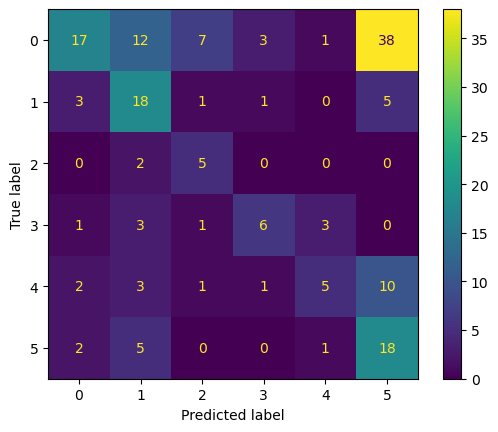

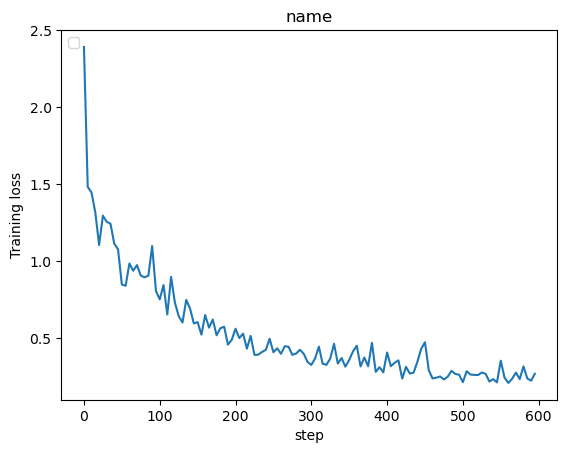

No handles with labels found to put in legend.


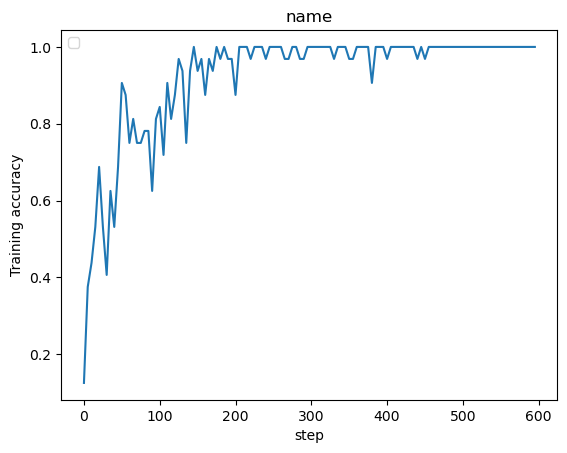

In [9]:
path = './graph'
steps = 600
train_loss = []
train_step = []
train_accuracy = []

with tf.compat.v1.Session(graph=graph, config=tf.compat.v1.ConfigProto(log_device_placement=True)) as session:
    tf.compat.v1.global_variables_initializer().run()
    saver = tf.compat.v1.train.Saver()
    writer = tf.compat.v1.summary.FileWriter(path, session.graph)
    #train_predic = np.zeros((train_size, num_genre))
    for step in range(steps):
        offset = (step * batch_size) % (train_size - batch_size)
        seg_features = train_features[offset:(offset + batch_size), :]
        seg_labels = train_labels[offset:(offset + batch_size)]
        
        feed_dict = {tf_trainfeatures: seg_features, tf_trainlabels: seg_labels}
        _, ls, pred, lr = session.run([optimize, loss, train_pred, learning_rate], feed_dict=feed_dict)
        
        acc = accuracy(np.argmax(pred, axis=1), seg_labels)
        #train_predic[offset:offset + batch_size, :] = pred
        
        if step % 5 == 0:
            print('Step:', step)
            print('Learning rate of this step:', lr)
            print('Training loss of this step:', ls)
            print('Training accuracy of this step:', acc)
            train_loss.append(ls)
            train_step.append(step)
            train_accuracy.append(acc)
            if (lr == 0):
                break
    
    # train_accuracy = accuracy(np.argmax(train_predic, axis=1), train_labels)
    # print('Training Accuracy:', train_accuracy)
    
    
    test_predic = np.zeros((test_size, num_genre))
    test_num = int(test_size / test_batch_size)
    for step in range(test_num):
        offset = (step * test_batch_size) % (test_size - test_batch_size)
        seg_features = test_features[offset:(offset + test_batch_size), :]
        feed_dict = {tf_testfeatures: seg_features}
        pred = session.run(test_pred, feed_dict=feed_dict)
        test_predic[offset:offset + test_batch_size, :] = pred
    
    test_pred_labels = np.argmax(test_predic, axis=1)
    test_accuracy = accuracy(test_pred_labels, test_labels)
    print('Test accuracy:', test_accuracy)
    
    writer.close()
    saver.save(session, "./saved_model/model.ckpt")
    
    conf_mat = confusion_matrix(test_labels, test_pred_labels)
    cm_display = ConfusionMatrixDisplay(conf_mat, display_labels=np.arange(num_genre)).plot()
    
    myplot(train_step, train_loss, 'training loss.png', 'step', 'Training loss')
    myplot(train_step, train_accuracy, 'training accuracy.png', 'step', 'Training accuracy')

# SVM

In [11]:
from __future__ import print_function
import numpy as np
from six.moves import cPickle as pickle
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [45]:
with open("features.pkl", 'rb') as file:
    data = pickle.load(file)
    train_features = data['train_features']
    train_labels = data['train_labels']
    test_features = data['test_features']
    test_labels = data['test_labels']

del data
width = train_features.shape[1]
height = train_features.shape[2]
train_features = train_features.reshape((-1, width*height)).astype(np.float32)
test_features = test_features.reshape((-1, width*height)).astype(np.float32)

In [10]:
pca = PCA(n_components=1567)
pca.fit(train_features)
train_features = pca.transform(train_features)
test_features = pca.transform(test_features)

Training Accuracy: 0.9342693044033185
Testing Accuracy: 0.7314285714285714


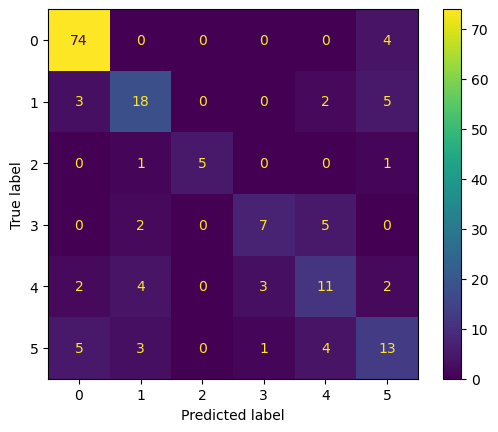

In [12]:
num_genre = 6
clf = SVC(C=0.1, coef0=1000.0, degree=1, gamma=0.0001, kernel='poly')
clf.fit(train_features, train_labels)
train_pred = clf.predict(train_features)
train_accuracy = accuracy(train_pred, train_labels)
print('Training Accuracy:', train_accuracy)
test_pred = clf.predict(test_features)
test_accuracy = accuracy(test_pred, test_labels)
print('Testing Accuracy:', test_accuracy)
conf_mat = confusion_matrix(test_labels, test_pred)
cm_display = ConfusionMatrixDisplay(conf_mat, display_labels=np.arange(num_genre)).plot()

# GMM

In [4]:
from __future__ import print_function
import numpy as np
from six.moves import cPickle as pickle
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [5]:
with open("features.pkl", 'rb') as file:
    data = pickle.load(file)
    train_features = data['train_features']
    train_labels = data['train_labels']
    test_features = data['test_features']
    test_labels = data['test_labels']

del data

width = train_features.shape[1]
height = train_features.shape[2]
train_features = train_features.reshape((-1, width*height)).astype(np.float32)
test_features = test_features.reshape((-1, width*height)).astype(np.float32)

In [7]:
pca = PCA(n_components=1567)
pca.fit(train_features)
train_features = pca.transform(train_features)
test_features = pca.transform(test_features)

Training Accuracy: 1.0
Testing Accuracy: 0.72


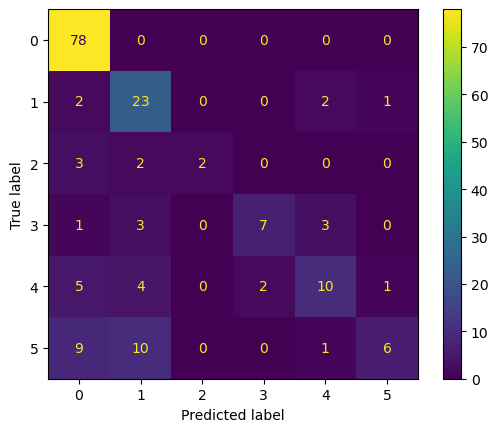

In [9]:
num_genre = 6
num_c = 4
GMM0 = GaussianMixture(n_components=num_c, covariance_type='full', warm_start=True, random_state=0)
GMM0.fit(train_features[train_labels == 0])

GMM1 = GaussianMixture(n_components=num_c, covariance_type='full', warm_start=True, random_state=0)
GMM1.fit(train_features[train_labels == 1])

GMM2 = GaussianMixture(n_components=num_c, covariance_type='full', warm_start=True, random_state=0)
GMM2.fit(train_features[train_labels == 2])

GMM3 = GaussianMixture(n_components=num_c, covariance_type='full', warm_start=True, random_state=0)
GMM3.fit(train_features[train_labels == 3])

GMM4 = GaussianMixture(n_components=num_c, covariance_type='full', warm_start=True, random_state=0)
GMM4.fit(train_features[train_labels == 4])

GMM5 = GaussianMixture(n_components=num_c, covariance_type='full', warm_start=True, random_state=0)
GMM5.fit(train_features[train_labels == 5])

s = np.zeros((1567, 6))
train_pred = np.zeros(1567)
s[:,0] = GMM0.score_samples(train_features)
s[:,1] = GMM1.score_samples(train_features)
s[:,2] = GMM2.score_samples(train_features)
s[:,3] = GMM3.score_samples(train_features)
s[:,4] = GMM4.score_samples(train_features)
s[:,5] = GMM5.score_samples(train_features)

train_pred = np.argmax(s, axis=1)
train_accuracy = accuracy(train_pred, train_labels)
print('Training Accuracy:', train_accuracy)

s_test = np.zeros((175, 6))
test_pred = np.zeros(175)
s_test[:,0] = GMM0.score_samples(test_features)
s_test[:,1] = GMM1.score_samples(test_features)
s_test[:,2] = GMM2.score_samples(test_features)
s_test[:,3] = GMM3.score_samples(test_features)
s_test[:,4] = GMM4.score_samples(test_features)
s_test[:,5] = GMM5.score_samples(test_features)

test_pred = np.argmax(s_test, axis=1)
test_accuracy = accuracy(test_pred, test_labels)
print('Testing Accuracy:', test_accuracy)
conf_mat = confusion_matrix(test_labels, test_pred)
cm_display = ConfusionMatrixDisplay(conf_mat, display_labels=np.arange(num_genre)).plot()